In [1]:
import pandas as pd
import networkx as nx
df = pd.read_csv("bhs.csv")

In [2]:
df.head(125)

,bahasa,daerah
0,Bahasa Makassar,Sulawesi Selatan
1,Bahasa Sunda,Jawa Barat
2,Bahasa Sunda,Banten
3,Bahasa Sunda,Jakarta
4,Bahasa Sunda,Lampung
...,...,...
120,Bahasa Keninjal,Nangapinoh
121,Bahasa Keninjal,Nangaella
122,Bahasa Keninjal,Nangasayan
123,Bahasa Keninjal,Gelalak


In [3]:
#bahasa
g = nx.from_pandas_edgelist(df, source='bahasa', target='daerah')

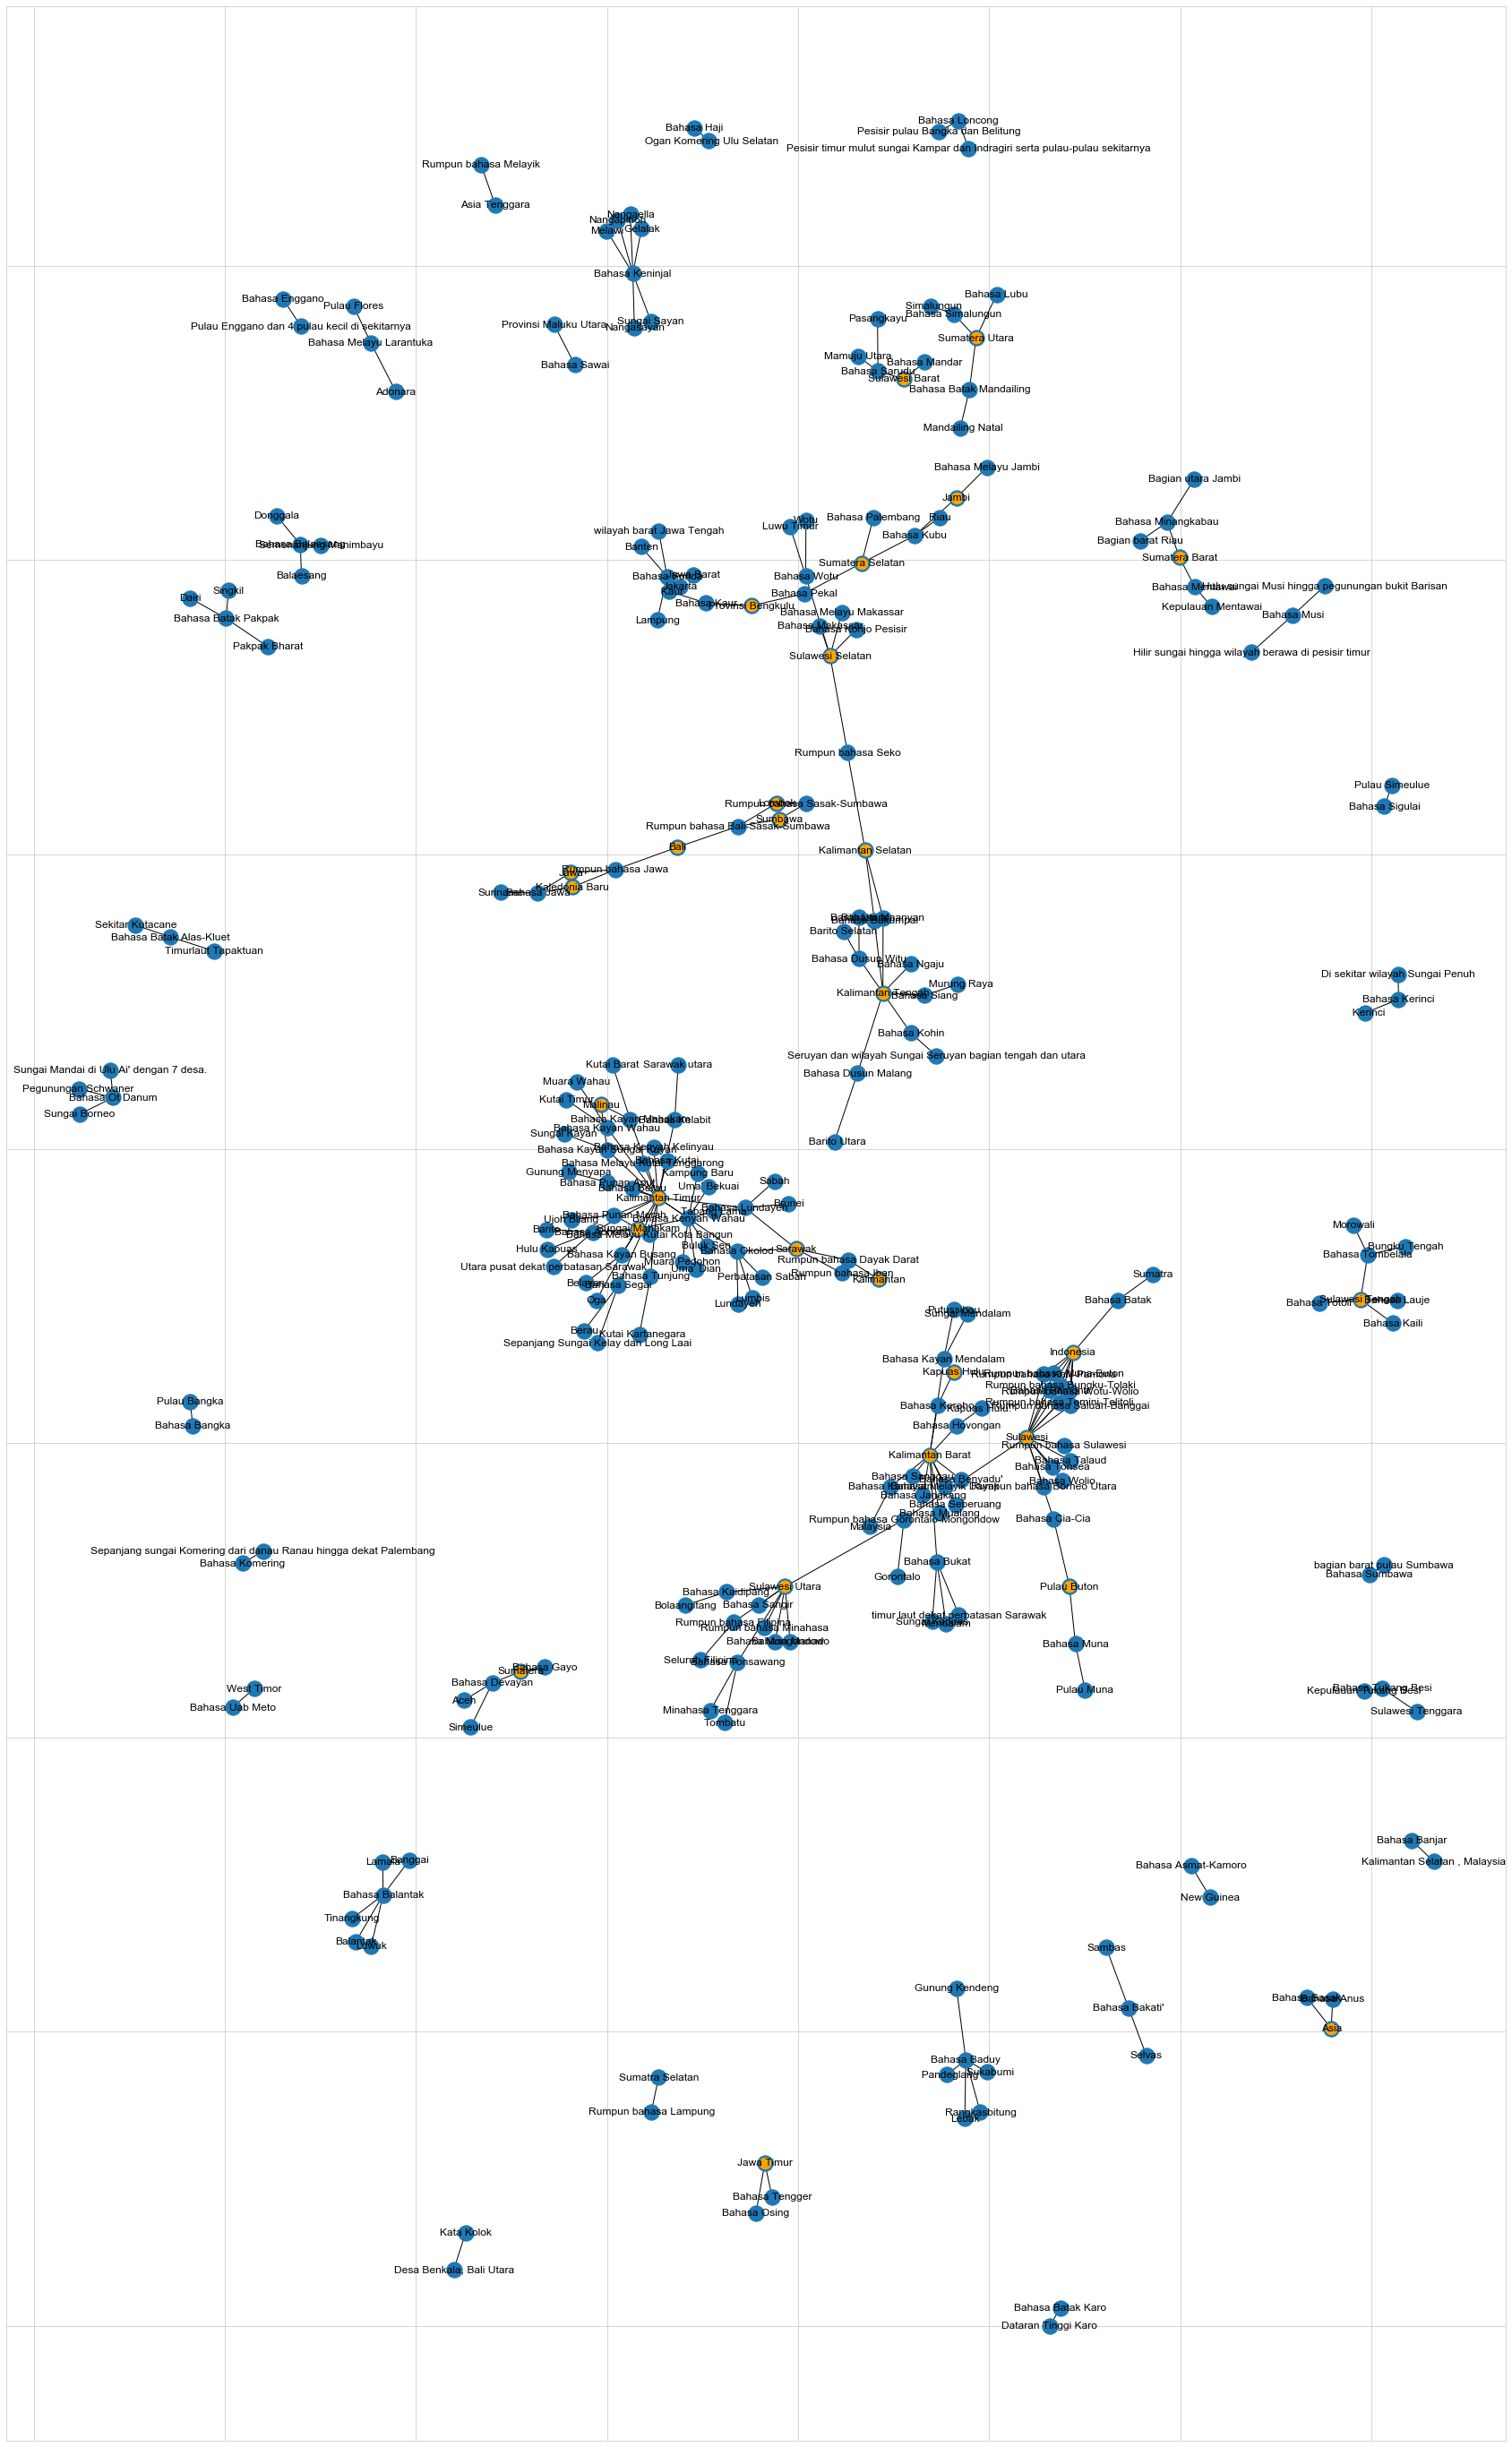

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

fig, ax = plt.subplots(figsize=(30,50))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

daerahpop = [daerah for daerah in df.daerah if g.degree(daerah) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=daerahpop, node_color='orange', node_size=150)

In [6]:
density = nx.density(g)
print("Network Density : ", density)

Network Density :  0.006819833417183744


In [7]:
degree_dict = dict(g.degree(g.nodes()))
degree_dict

{'Bahasa Makassar': 1,
 'Sulawesi Selatan': 5,
 'Bahasa Sunda': 5,
 'Jawa Barat': 1,
 'Banten': 1,
 'Jakarta': 1,
 'Lampung': 1,
 'wilayah barat Jawa Tengah': 1,
 'Bahasa Asmat-Kamoro': 1,
 'New Guinea': 1,
 'Bahasa Bakumpai': 2,
 'Kalimantan Tengah': 7,
 'Kalimantan Selatan': 3,
 'Bahasa Banjar': 1,
 'Kalimantan Selatan , Malaysia': 1,
 'Bahasa Batak': 2,
 'Indonesia': 8,
 'Sumatra': 1,
 'Bahasa Berau': 1,
 'Kalimantan Timur': 18,
 'Rumpun bahasa Borneo Utara': 1,
 'Sulawesi': 14,
 'Rumpun bahasa Bungku-Tolaki': 2,
 'Rumpun bahasa Sulawesi': 1,
 'Bahasa Cia-Cia': 2,
 'Pulau Buton': 2,
 'Bahasa Enggano': 1,
 'Pulau Enggano dan 4 pulau kecil di sekitarnya': 1,
 'Bahasa Gayo': 1,
 'Sumatera': 2,
 'Rumpun bahasa Gorontalo-Mongondow': 3,
 'Gorontalo': 1,
 'Sulawesi Utara': 8,
 'Bahasa Melayu Jambi': 1,
 'Jambi': 2,
 'Bahasa Jawa': 3,
 'Jawa': 2,
 'Suriname': 1,
 'Kaledonia Baru': 2,
 'Rumpun bahasa Kaili-Pamona': 2,
 'Kata Kolok': 1,
 'Desa Benkala, Bali Utara': 1,
 'Bahasa Komering': 1,
 

(-1.0883750799826217,
 1.0829390225778401,
 -1.091087035734378,
 1.1009521355285303)

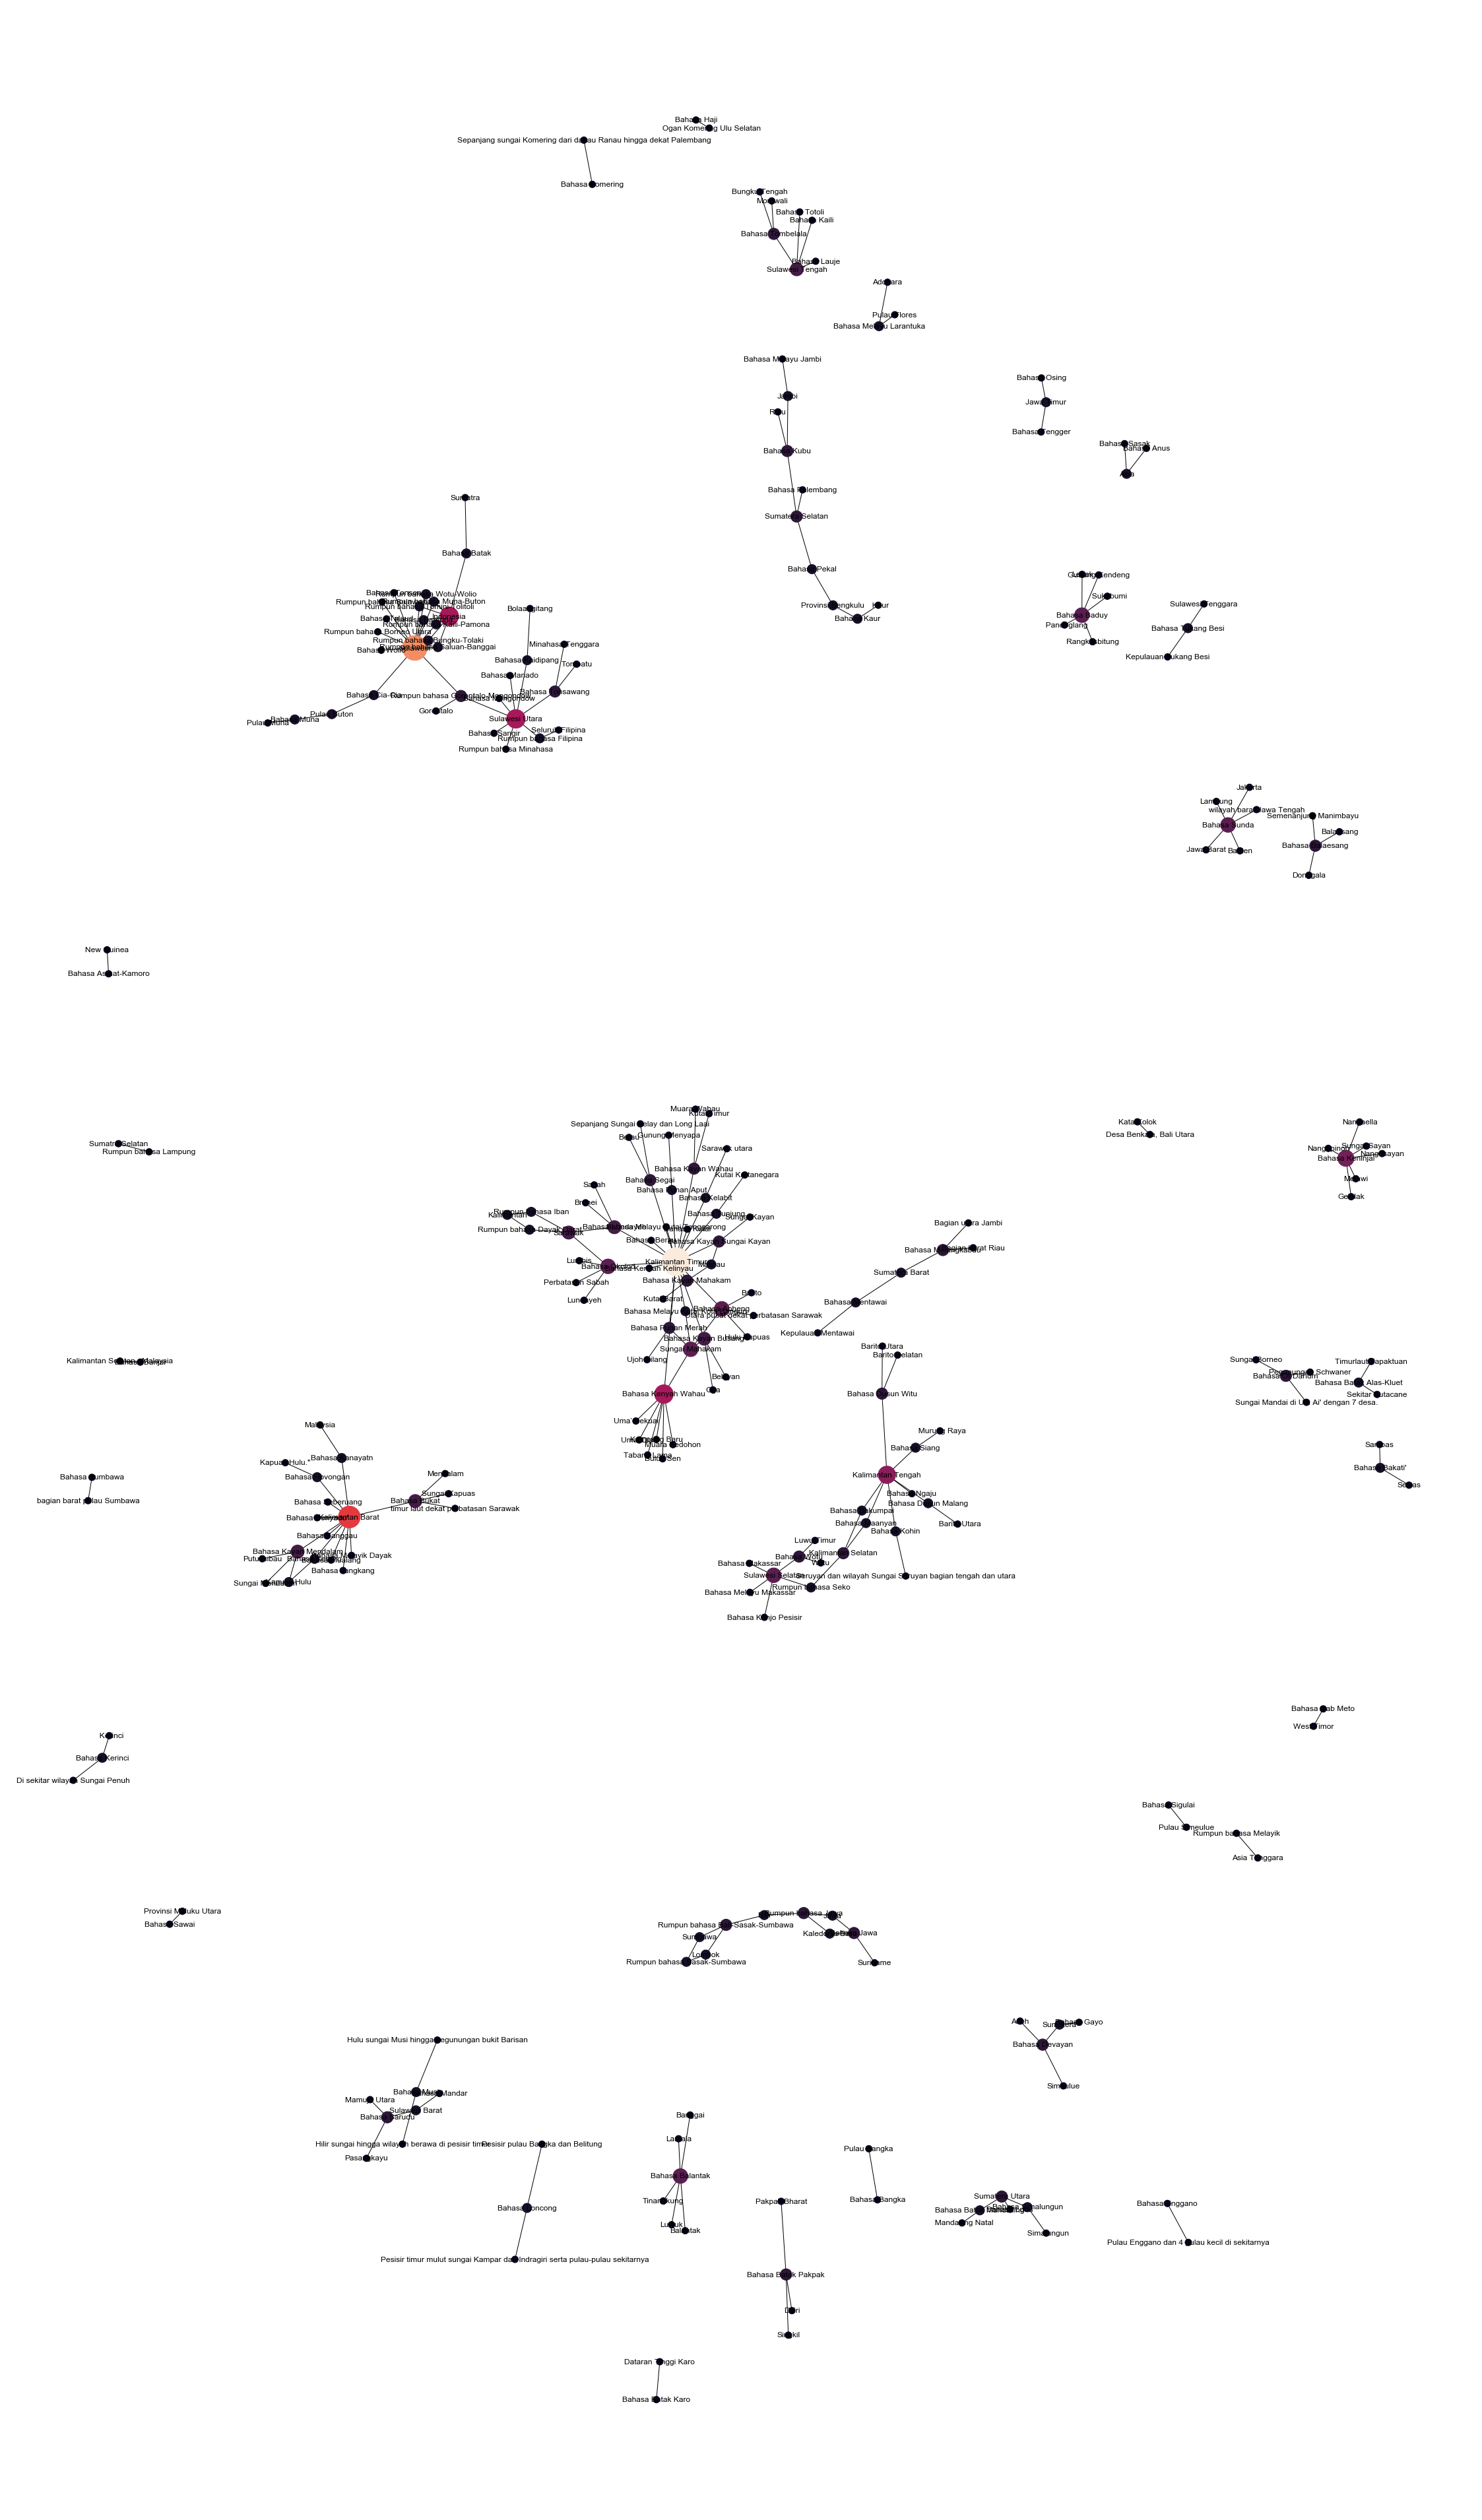

In [8]:
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size = [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(40,70))
nx.draw_networkx(g, pos=pos, with_labels=True,
 node_color=node_color,
 node_size=node_size )
plt.axis('off')

In [9]:
from operator import itemgetter

top3= sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Tiga Node Paling Populer :")
for b in top3[:3]:
 print(b)

Tiga Node Paling Populer :
('Kalimantan Timur', 18)
('Sulawesi', 14)
('Kalimantan Barat', 11)


In [10]:
bottom3= sorted(degree_dict.items(), key=itemgetter(1), reverse=False)
print("Node Yang Tidak Berpengaruh :")
for b in bottom3[:3]:
 print(b)

Node Yang Tidak Berpengaruh :
('Bahasa Makassar', 1)
('Jawa Barat', 1)
('Banten', 1)
